In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
from sklearn import preprocessing 

In [2]:
df=pd.read_csv("data(1).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


In [4]:
df=df.drop('id',axis=1)
#df=df.drop('Unnamed: 32',axis=1)
#mapping Benign to 0 and Malignant to 1
print(df)

df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
#scaling the data set

datas=pd.DataFrame(preprocessing.scale(df.iloc[:,1:32]))
datas.columns=list(df.iloc[:,1:32].columns)
datas['diagnosis']=df['diagnosis']

#creating the high dimensional feature space x
data_drop=datas.drop('diagnosis',axis=1)
X=data_drop.values

#creating a 20 visualization to visualize the cluster
from sklearn.manifold import TSNE
tsne=TSNE(verbose=1,perplexity=40,n_iter=4000)
Y=tsne.fit_transform(X)


    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

Text(0.5, 1.0, 'actual clusters')

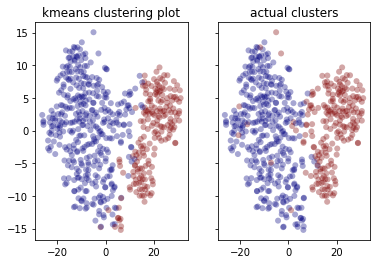

In [34]:
from sklearn.cluster import KMeans
kmns=KMeans(n_clusters=2,init='k-means++',n_init=50,max_iter=300,tol=0.0001)
kY=kmns.fit_predict(X)
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(Y[:,0],Y[:,1],c=kY,cmap="jet",edgecolor="none",alpha=0.35)
ax1.set_title('kmeans clustering plot')
ax2.scatter(Y[:,0],Y[:,1],c=datas['diagnosis'],cmap="jet",edgecolor="none",alpha=0.35)
ax2.set_title('actual clusters')

In [5]:
from sklearn_extra.cluster import KMedoids
kmedoids=KMedoids(n_clusters=2,random_state=0)
kY=kmedoids.fit_predict(X)

Text(0.5, 1.0, 'actual clusters')

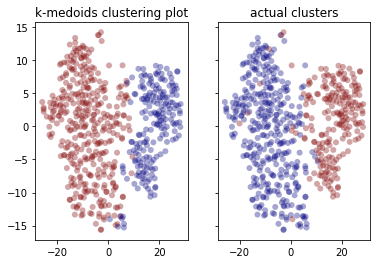

In [6]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(Y[:,0],Y[:,1],c=kY,cmap="jet",edgecolor="none",alpha=0.35)
ax1.set_title('k-medoids clustering plot')
ax2.scatter(Y[:,0],Y[:,1],c=datas['diagnosis'],cmap="jet",edgecolor="none",alpha=0.35)
ax2.set_title('actual clusters')

Text(0.5, 1.0, 'Actual clusters')

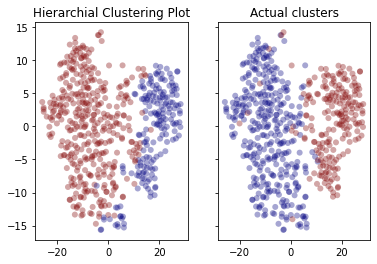

In [8]:
from sklearn.cluster import AgglomerativeClustering
aggC=AgglomerativeClustering(n_clusters=2,linkage='ward')
kY=aggC.fit_predict(X)
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)

ax1.scatter(Y[:,0],Y[:,1], c=kY,cmap="jet",edgecolor="None",alpha=0.35)
ax1.set_title('Hierarchial Clustering Plot')
ax2.scatter(Y[:,0],Y[:,1],c=datas['diagnosis'],cmap="jet",edgecolor="None",alpha=0.35)
ax2.set_title('Actual clusters')